# <i>Assignment:</i> Hodgkin Huxley Project

The following functions and constants are taken directly from the Chapter text. Running this cell will save some typing.

In [17]:
import math

# Constants
ENa = 55
EK = -77
EL = -65

gNa = 40
gK = 35
gL = .3

C = 1

Vhalf = {'n': 25, 'm': -35, 'h': -90}

# Activation functions
def alpha_n(V):
    if V == Vhalf['n']:
        return .5*alpha_n(V-.01) + .5*alpha_n(V+.01)
    return .02 * (V-Vhalf['n']) / (1 - math.exp(-1 * (V-Vhalf['n'])/9))

def beta_n(V):
    if V == Vhalf['n']:
        return .5*beta_n(V-.01) + .5*beta_n(V+.01)
    return -.002 * (V-Vhalf['n']) / (1 - math.exp((V-Vhalf['n'])/9))

def alpha_m(V):
    if V == Vhalf['m']:
        return .5*alpha_m(V-.01) + .5*alpha_m(V+.01)
    return .182 * (V-Vhalf['m']) / (1 - math.exp(-1 * (V-Vhalf['m'])/9) )

def beta_m(V):
    if V == Vhalf['m']:
        return .5*beta_m(V-.01) + .5*beta_m(V+.01)
    return -.124 * (V-Vhalf['m']) / (1 - math.exp( (V-Vhalf['m'])/9 ))

def alpha_h(V):
    return .25 * math.exp(-1 * (V-Vhalf['h']) / 12)

def beta_h(V):
    return .25 * math.exp( (V+62)/6 ) / math.exp( (V-Vhalf['h'])/12 )

## Problem 1
### Figure 2.3

Define the following functions based on the "Example: Time Constants, Transition Rates, and Channel Kinetics" box in the Chapter:
<ul>
    <li>n0</li>
    <li>m0</li>
    <li>h0</li>
    <li>tau_n</li>
    <li>tau_m</li>
    <li>tau_h</li>
</ul>

Using these functions, replicate Figure 2.3.

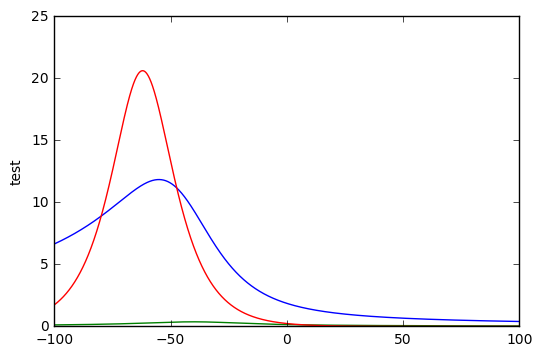

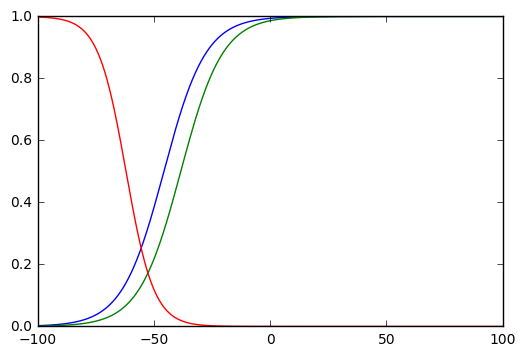

In [12]:
import matplotlib.pyplot as plt
import numpy as np

u = -100

def n0(i): 
    return alpha_n(i)/(alpha_n(i)+ beta_n (i))
def m0(i): 
    return alpha_m(i)/(alpha_m(i)+ beta_m (i))
def h0(i):
    return alpha_h(i)/(alpha_h(i)+ beta_h (i))

#we found these equations online, n infinity? not sure if right but whatevs

#n0 = n(u)
#m0 = m(u)
#h0 = h(u)

def tau_n (v):
    return (abs(alpha_n(v) + beta_n (v)))**-1
def tau_m (v):
    return (abs(alpha_m(v) + beta_m (v)))**-1
def tau_h (v):
    return (abs(alpha_h(v) + beta_h (v)))**-1

du = .01

tna = np.zeros(20000)
tma = np.zeros(20000)
tha = np.zeros(20000)
us  = np.zeros(20000)

for i in range (0, 20000):
    tna[i] = tau_n(u)
    tma[i] = tau_m(u)
    tha[i] = tau_h(u)
    us[i]  = u
    u = u + du
plt.plot(us, tna, us, tma, us, tha)
plt.ylabel('test')
plt.show()

#Here is where I realized I messed up, and had to make 3 seperate function
#how would I make this cleaner?




dna = np.zeros(20000)
dma = np.zeros(20000)
dha = np.zeros(20000)
dus = np.zeros(20000)

u=-100

for i in range (0, 20000):
    dna[i] = n0(u)
    dma[i] = m0(u)
    dha[i] = h0(u)
    dus[i]  = u
    u = u + du
    

plt.plot(dus, dna, dus, dma, dus, dha)
#plt.ylabel('test')
plt.show()

    #REP Matt Hollaback and Kaarthic
        


## Problem 2
### Figure 2.6

Define functions for the time derivatives of $V$, $n$, $m$, and $h$ (hint: for $\dot{V}$ see Equation 2.4 and for the others see Equation 2.6.

Using these functions, reproduce the three left plots in Figure 2.6. I find that setting the input current to 15 between 1 ms and 2 ms does the trick.

<b><i>For some reason, the only way I could get this to reproduce the figure was to change <code>Vhalf['n']</code> to be -25 instead of 25. The following cell makes this change.</i></b>

In [18]:
Vhalf['n'] = -25

In [26]:
Va = np.zeros(20000)
ta = np.zeros(20000)


u_c= -65
n_c = n0(u)
m_c = m0(u)
h_c = h0(u)


def dndt (u,n):
    return (-(tau_n(u))**-1)*(n-n0(u))

def dmdt (u,m):
    return (-(tau_m(u))**-1)*(m-m0(u))
            
def dhdt (u,h):
    return (-(tau_h(u))**-1)*(h-h0(u))
            
def dvdt(u,n,m,h):

    return gK*(dndt(u,n))**4*(u-EK)+gNa*(dndt(u,n))**3*dhdt(u,n)*(u-ENa)+gL*(u-EL)-ic


def V(u):
    dt = .01
    return dvdt(u_c,n_c,m_c,h_c)*dt + u_c
    

for i in range (1,20000):
    if 1000<= i <=2000:
        ic = 15
    else:
        ic = 0
    Va [i] = V(u_c)
    ta [i]= i/1000
    n_c += dndt (u_c,n_c)
    m_c += dmdt (u_c,m_c)
    h_c += dhdt (u_c,h_c)      
    u_c = Va[i]
            

print (Va)

    
plt.plot(ta, Va)
#plt.ylabel('test')
plt.show() 

C:\Users\Data\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Data\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: invalid value encountered in double_scalars


OverflowError: math range error

## Problem 3
### Figure 2.7

Reproduce panels A and B. You will need to write a function that determines the average time between action potentials in a voltage array. Recall that firing frequency is equalt to $1/T$ where $T$ is the average time between action potentials.

The chapter reports input current in units of $\mu A/cm^2$. Vary your input current from 0 to 1, whihch assumes a pretty typical neuron surface areas of 10 $cm^2$.

In [ ]:
Vhalf['n'] = 25

## Problem 4
### Figure 2.8

Reproduce panel A. The input current should be drawn from a normal distribution $\mathcal{N}(0, \sigma)$. Adjust $\sigma$ until you get something that you like.

In [ ]:
Vhalf['n'] = -25

## Problem 5
### Figure 2.9

Reproduce this figure by giving 1 ms current pulses starting at 20 ms, 35 ms, 45 ms, and 55 ms. Adjust the strength of the input current to demonstrate the properties of the refractory period.

In [ ]:
Vhalf['n'] = -25